<a href="https://colab.research.google.com/github/claytonchagas/1-speedup-sci-exp-research-intpy-first-ten-experiments-proofs-of-concept/blob/main/exp3_4_power_ast_only_files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [95.2 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [983 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports In

In [2]:

!sudo apt-get install python3.9

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libpython3.9-minimal libpython3.9-stdlib python3.9-minimal
Suggested packages:
  python3.9-venv binfmt-support
The following NEW packages will be installed:
  libpython3.9-minimal libpython3.9-stdlib python3.9 python3.9-minimal
0 upgraded, 4 newly installed, 0 to remove and 38 not upgraded.
Need to get 4,917 kB of archives.
After this operation, 19.1 MB of additional disk space will be used.
Get:1 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic/main amd64 libpython3.9-minimal amd64 3.9.15-1+bionic1 [805 kB]
Get:2 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic/main amd64 python3.9-minimal amd64 3.9.15-1+bionic1 [1,938 kB]
Get:3 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic/main am

In [3]:
!python3.9 -V
!which python3.9

Python 3.9.15
/usr/bin/python3.9


#**i. Colab hardware and software specs:**
- n1-highmem-2 instance

- 2vCPU @ 2.3GHz

- 13GB RAM

- 100GB Free Space

- idle cut-off 90 minutes

- maximum lifetime 12 hours

In [4]:
# Colab hardware info (processor and memory):
# !cat /proc/cpuinfo
# !cat /proc/memoinfo
# !lscpu
!lscpu | egrep 'Model name|Socket|Thread|NUMA|CPU\(s\)'
print("---------------------------------")
!free -m

CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Socket(s):           1
NUMA node(s):        1
Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz
NUMA node0 CPU(s):   0,1
---------------------------------
              total        used        free      shared  buff/cache   available
Mem:          12985         820       10109           1        2055       11938
Swap:             0           0           0


In [5]:
# Colab SO structure and version
!ls -a
print("---------------------------------")
!ls -l /
print("---------------------------------")
!lsb_release -a

.  ..  .config	sample_data
---------------------------------
total 112
drwxr-xr-x   1 root root  4096 Oct 18 13:27 bin
drwxr-xr-x   2 root root  4096 Apr 24  2018 boot
drwxr-xr-x   1 root root  4096 Oct 18 13:36 content
drwxr-xr-x   1 root root  4096 Oct 18 13:49 datalab
drwxr-xr-x   5 root root   360 Oct 19 21:00 dev
drwxr-xr-x   1 root root  4096 Oct 19 21:01 etc
drwxr-xr-x   2 root root  4096 Apr 24  2018 home
drwxr-xr-x   1 root root  4096 Oct 18 13:29 lib
drwxr-xr-x   2 root root  4096 Oct 18 13:24 lib32
drwxr-xr-x   2 root root  4096 May 31 11:55 lib64
drwxr-xr-x   2 root root  4096 May 31 11:54 media
drwxr-xr-x   2 root root  4096 May 31 11:54 mnt
-rw-r--r--   1 root root 16047 Jul 11 20:48 NGC-DL-CONTAINER-LICENSE
drwxr-xr-x   1 root root  4096 Oct 18 13:50 opt
dr-xr-xr-x 184 root root     0 Oct 19 21:00 proc
drwxr-xr-x  14 root root  4096 Oct 18 13:30 python-apt
drwx------   1 root root  4096 Oct 18 13:50 root
drwxr-xr-x   1 root root  4096 Oct 18 13:27 run
drwxr-xr-x   1 root

#**ii. Cloning IntPy repository:**
- https://github.com/claytonchagas/1-speedup-sci-exp-research-intpy-first-ten-experiments-proofs-of-concept 

In [6]:
!git clone https://github.com/claytonchagas/1-speedup-sci-exp-research-intpy-first-ten-experiments-proofs-of-concept

Cloning into '1-speedup-sci-exp-research-intpy-first-ten-experiments-proofs-of-concept'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 60 (delta 16), reused 26 (delta 4), pack-reused 0
Unpacking objects: 100% (60/60), done.


In [7]:
%cd 1-speedup-sci-exp-research-intpy-first-ten-experiments-proofs-of-concept/
!ls -a

/content/1-speedup-sci-exp-research-intpy-first-ten-experiments-proofs-of-concept
.				exp4_quicksort_fixed.py
..				exp5_quicksort_random.py
colabs				exp6_heat_distribution_lu
exp10_qho-2-electrons		exp7_heap_permutation.py
exp1_fibonacci_recursive.py	exp8_digital_rads
exp2_fibonacci_iterative.py	exp9_vince_sim.py
exp3_2_power_ast.ipynb		.git
exp3_3_power_ast_only_DB.ipynb	README.md
exp3_power.py			stats_colab.py


- https://github.com/claytonchagas/intpy_dev.git

In [8]:
!git clone https://github.com/claytonchagas/intpy_dev.git

Cloning into 'intpy_dev'...
remote: Enumerating objects: 969, done.
remote: Total 969 (delta 0), reused 0 (delta 0), pack-reused 969
Receiving objects: 100% (969/969), 24.63 MiB | 18.88 MiB/s, done.
Resolving deltas: 100% (693/693), done.


In [9]:
%cd intpy_dev/
!git checkout 18cd5d7

/content/1-speedup-sci-exp-research-intpy-first-ten-experiments-proofs-of-concept/intpy_dev
Note: checking out '18cd5d7'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at 18cd5d7 Removing DEBUG messages


In [10]:
!cp -r intpy/ ../
%cd ..
!ls -a

/content/1-speedup-sci-exp-research-intpy-first-ten-experiments-proofs-of-concept
.			     exp3_3_power_ast_only_DB.ipynb  exp9_vince_sim.py
..			     exp3_power.py		     .git
colabs			     exp4_quicksort_fixed.py	     intpy
exp10_qho-2-electrons	     exp5_quicksort_random.py	     intpy_dev
exp1_fibonacci_recursive.py  exp6_heat_distribution_lu	     README.md
exp2_fibonacci_iterative.py  exp7_heap_permutation.py	     stats_colab.py
exp3_2_power_ast.ipynb	     exp8_digital_rads


In [11]:
!git branch
print("---------------------------------")
#!git log --pretty=oneline --abbrev-commit
#!git log --all --decorate --oneline --graph 

* main
---------------------------------


#**iii. Power's evolutions and cutoff by approach**

- Evaluating recursive power code and its cutoff by approach

In [12]:
!ls -a
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
!rm -rf output_iii.dat
print("--no-cache execution")
#1..327
!for i in {1..300}; do python3.9 exp3_power.py 1 $i --no-cache >> output_iii.dat; rm -rf .intpy; done
print("done!")
print("only intra cache")
!for i in {1..300}; do python3.9 exp3_power.py 1 $i -v v01x >> output_iii.dat; rm -rf .intpy; done
print("done!")
print("full cache")
!for i in {1..300}; do python3.9 exp3_power.py 1 $i -v v01x >> output_iii.dat; done
print("done!")

.			     exp3_3_power_ast_only_DB.ipynb  exp9_vince_sim.py
..			     exp3_power.py		     .git
colabs			     exp4_quicksort_fixed.py	     intpy
exp10_qho-2-electrons	     exp5_quicksort_random.py	     intpy_dev
exp1_fibonacci_recursive.py  exp6_heat_distribution_lu	     README.md
exp2_fibonacci_iterative.py  exp7_heap_permutation.py	     stats_colab.py
exp3_2_power_ast.ipynb	     exp8_digital_rads
---------------------------------
Cleaning up cache
--no-cache execution
done!
only intra cache
done!
full cache
done!


[0.0, 1e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 3e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 2e-05, 3e-05, 2e-05, 2e-05, 2e-05, 2e-05, 2e-05, 2e-05, 2e-05, 2e-05, 2e-05, 2e-05, 2e-05, 2e-05, 2e-05, 2e-05, 3e-05, 4e-05, 2e-05, 3e-05, 2e-05, 2e-05, 2e-05, 4e-05, 2e-05, 2e-05, 2e-05, 2e-05, 2e-05, 3e-05, 4e-05, 3e-05, 3e-05, 3e-05, 4e-05, 3e-05, 5e-05, 5e-05, 4e-05, 3e-05, 3e-05, 4e-05, 3e-05, 3e-05, 3e-05, 3e-05, 3e-05, 3e-05, 3e-05, 3e-05, 4e-05, 4e-05, 4e-05, 4e-05, 4e-05, 4e-05, 6e-05, 5e-05, 4e-05, 4e-05, 6e-05, 4e-05, 4e-05, 5e-05, 4e-05, 4e-05, 6e-05, 8e-05, 5e-05, 5e-05, 5e-05, 5e-05, 5e-05, 5e-05, 5e-05, 6e-05, 5e-05, 5e-05, 0.0001, 7e-05, 5e-05, 5e-05, 5e-05, 6e-05, 5e-05, 5e-05, 5e-05, 5e-05, 7e-05, 6e-05, 6e-05, 8e-05, 5e-05, 5e-05, 9e-05, 7e-05, 6e-05, 6e-05, 7e-05, 6e-05, 8e-05, 6e-05, 7e-05, 6e-05, 6e-05, 7e-05, 7e-05, 8e-05, 6e-05, 7e-0

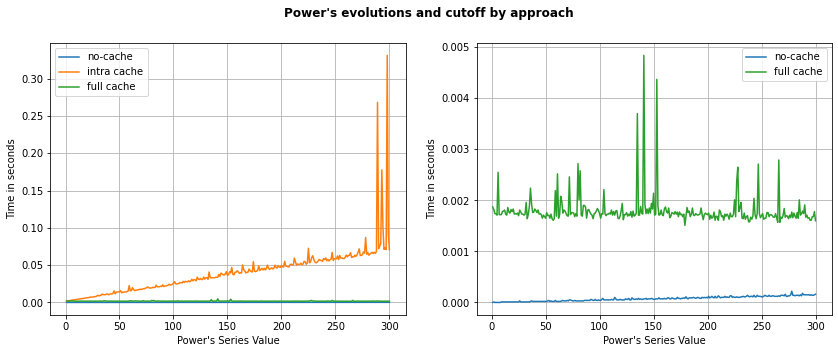

In [13]:
import matplotlib.pyplot as plt
import numpy as np

f1 = open("output_iii.dat", "r")
data1 = []
dataf1 = []
for x in f1.readlines()[3:1200:4]:
  data1.append(float(x))
f1.close()
for datas1 in data1:
  dataf1.append(round(datas1, 5))
print(dataf1)

f2 = open("output_iii.dat", "r")
data2 = []
dataf2 = []
for x in f2.readlines()[1203:2400:4]:
  data2.append(float(x))
f2.close()
for datas2 in data2:
  dataf2.append(round(datas2, 5))
print(dataf2)

f3 = open("output_iii.dat", "r")
data3 = []
dataf3 = []
for x in f3.readlines()[2403:3600:4]:
  data3.append(float(x))
f3.close()
for datas3 in data3:
  dataf3.append(round(datas3, 5))
print(dataf3)

x = np.arange(1, 301)

#plt.style.use('classic')

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(14)
fig.suptitle("Power's evolutions and cutoff by approach", fontweight='bold')
ax1.plot(x, dataf1, "tab:blue", label="no-cache")
ax1.plot(x, dataf2, "tab:orange", label="intra cache")
ax1.plot(x, dataf3, "tab:green", label="full cache")
#ax1.set_title("Power's evolutions and cutoff by approach")
ax1.set_xlabel("Power's Series Value")
ax1.set_ylabel("Time in seconds")
ax1.grid()
lex = ax1.legend()

ax2.plot(x, dataf1, "tab:blue", label="no-cache")
ax2.plot(x, dataf3, "tab:green", label="full cache")
#ax2.set_title("Power's evolutions and cutoff by approach")
ax2.set_xlabel("Power's Series Value")
ax2.set_ylabel("Time in seconds")
ax2.grid()
lex = ax2.legend()

plt.show()

#**iv. Power 1 ^ 300, 150 and 75 recursive, three mixed trials**

- Evaluating recursive power code, input 300, 150, and 75, three trials and plot.
- First trial: inputs: 1 ^ 300, 150 and 75, no inter-cache (baseline).
- Second trial: with inter and intra-cache, inputs: 1 ^ 300, 150 and 75, analyzing the cache's behavior with different inputs.
- Third trial: with inter and intra-cache, inputs: 1 ^ 75, 150 and 300, analyzing the cache's behavior with different inputs, in a different order of the previous running.

In [14]:
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
!rm -rf output_iv.dat
print("First running, Power 1^300: value and time in sec")
!python3.9 exp3_power.py 1 300 -v v01x | tee -a output_iv.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Second running, Power 1^150: value and time in sec")
!python3.9 exp3_power.py 1 150 -v v01x | tee -a output_iv.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Third running, Power 1^75: value and time in sec")
!python3.9 exp3_power.py 1 75 -v v01x | tee -a output_iv.dat
print("---------------------------------")

---------------------------------
Cleaning up cache
First running, Power 1^300: value and time in sec
['v01x']
False
1
0.07409688199999209
---------------------------------
Cleaning up cache
Second running, Power 1^150: value and time in sec
['v01x']
False
1
0.049161796999982244
---------------------------------
Cleaning up cache
Third running, Power 1^75: value and time in sec
['v01x']
False
1
0.01889966799998888
---------------------------------


- Second trial: with inter and intra-cache, inputs: 1 ^ 300, 150 and 75.

In [15]:
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("First running, Power 1^300: value and time in sec")
!python3.9 exp3_power.py 1 300 -v v01x | tee -a output_iv.dat
print("---------------------------------")
print("Second running, Power 1^150: value and time in sec")
!python3.9 exp3_power.py 1 150 -v v01x | tee -a output_iv.dat
print("---------------------------------")
print("Third running, Power 1^75: value and time in sec")
!python3.9 exp3_power.py 1 75 -v v01x | tee -a output_iv.dat
print("---------------------------------")

---------------------------------
Cleaning up cache
First running, Power 1^300: value and time in sec
['v01x']
False
1
0.07852544900001135
---------------------------------
Second running, Power 1^150: value and time in sec
['v01x']
False
1
0.0013262649999887799
---------------------------------
Third running, Power 1^75: value and time in sec
['v01x']
False
1
0.0013600320000080046
---------------------------------


- Third trial: with inter and intra-cache, inputs: 1 ^ 75, 150 and 300.

In [16]:
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("First running, Power 1^75: value and time in sec")
!python3.9 exp3_power.py 1 75 -v v01x | tee -a output_iv.dat
print("---------------------------------")
print("Second running, Power 1^150: value and time in sec")
!python3.9 exp3_power.py 1 150 -v v01x | tee -a output_iv.dat
print("---------------------------------")
print("Third running, Power 1^300: value and time in sec")
!python3.9 exp3_power.py 1 300 -v v01x | tee -a output_iv.dat
print("---------------------------------")

---------------------------------
Cleaning up cache
First running, Power 1^75: value and time in sec
['v01x']
False
1
0.01869008299999564
---------------------------------
Second running, Power 1^150: value and time in sec
['v01x']
False
1
0.019107687999991185
---------------------------------
Third running, Power 1^300: value and time in sec
['v01x']
False
1
0.04047113299998273
---------------------------------


- Plotting the comparison: first graph.

[0.074097, 0.049162, 0.0189, 0.078525, 0.001326, 0.00136, 0.01869, 0.019108, 0.040471]
[0.074097, 0.078525, 0.040471]
[0.049162, 0.001326, 0.019108]
[0.0189, 0.00136, 0.01869]


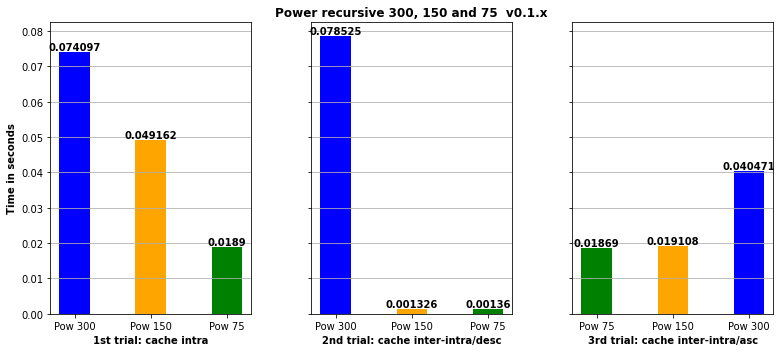

In [17]:
import numpy as np

f4 = open("output_iv.dat", "r")
pow300 = []
pow150 = []
pow75 = []
data4 = []
dataf4 = []
for x in f4.readlines()[3::4]:
  data4.append(float(x))
f4.close()

for datas4 in data4:
  dataf4.append(round(datas4, 6))

print(dataf4)

pow327 = [dataf4[0], dataf4[3], dataf4[8]]
print(pow327)

pow164 = [dataf4[1], dataf4[4], dataf4[7]]
print(pow164)

pow82 = [dataf4[2], dataf4[5], dataf4[6]]
print(pow82)

running3to5 = ['1st trial: cache intra', '2nd trial: cache inter-intra/desc', '3rd trial: cache inter-intra/asc']

y = np.arange(len(running3to5))
width = 0.40

z = ['Pow 300', 'Pow 150', 'Pow 75']
list_color_z = ['blue', 'orange', 'green']

zr = ['Pow 75', 'Pow 150', 'Pow 300']
list_color_zr = ['green', 'orange', 'blue']

t1=[dataf4[0], dataf4[1], dataf4[2]]
t2=[dataf4[3], dataf4[4], dataf4[5]]
t3=[dataf4[6], dataf4[7], dataf4[8]]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(11,5))
rects1 = ax1.bar(z, t1,width, label='1st trial', color=list_color_z)
rects2 = ax2.bar(z, t2, width, label='2nd trial', color=list_color_z)
rects3 = ax3.bar(zr, t3, width, label='3rd trial', color=list_color_zr)

ax1.set_ylabel('Time in seconds', fontweight='bold')
ax1.set_xlabel('1st trial: cache intra', fontweight='bold')
ax2.set_xlabel('2nd trial: cache inter-intra/desc', fontweight='bold')
ax3.set_xlabel('3rd trial: cache inter-intra/asc', fontweight='bold')

ax2.set_title('Power recursive 300, 150 and 75  v0.1.x', fontweight='bold')

for index, datas in enumerate(t1):
  ax1.text(x=index, y=datas, s=t1[index], ha = 'center', va = 'bottom', fontweight='bold')

for index, datas in enumerate(t2):
  ax2.text(x=index, y=datas, s=t2[index], ha = 'center', va = 'bottom', fontweight='bold')

for index, datas in enumerate(t3):
  ax3.text(x=index, y=datas, s=t3[index], ha = 'center', va = 'bottom', fontweight='bold')

ax1.grid(axis='y')
ax2.grid(axis='y')
ax3.grid(axis='y')

fig.tight_layout()
plt.savefig('chart_iv_pow_75_150_300_v01x.png')
plt.show()

#**1. Fast execution, all versions (v0.1.x and from v0.2.1.x to v0.2.7.x)**

##**1.1 Fast execution: only intra-cache**

###**1.1.1 Fast execution: only intra-cache => experiment's executions**

In [18]:
!rm -rf .intpy;\
rm -rf stats_intra.dat;\
echo "IntPy only intra-cache";\
experimento=exp3_power.py;\
param1=1;\
param2=300;\
echo "Experiment: $experimento";\
echo "Params: $param1 $param2";\
for i in "--no-cache" "v01x" "v021x" "v022x" "v023x" "v024x" "v025x" "v026x" "v027x";\
    do rm -rf output_intra_$i.dat;\
    rm -rf .intpy;\
    echo "---------------------------------";\
    echo "IntPy version $i";\
    for j in {1..5};\
        do echo "Execution $j";\
        rm -rf .intpy;\
        if [ "$i" = "--no-cache" ]; then python3.9 $experimento $param1 $param2 $i >> output_intra_$i.dat;\
        else python3.9 $experimento $param1 $param2 -v $i >> output_intra_$i.dat;\
        fi;\
        echo "Done execution $j";\
    done;\
    echo "Done IntPy version $i";\
done;\
echo "---------------------------------";\
echo "---------------------------------";\
echo "Statistics evaluation:";\
for k in "--no-cache" "v01x" "v021x" "v022x" "v023x" "v024x" "v025x" "v026x" "v027x";\
        do echo "Statistics version $k" >> stats_intra.dat;\
        echo "Statistics version $k";\
        python3.9 stats_colab.py output_intra_$k.dat;\
        python3.9 stats_colab.py output_intra_$k.dat >> stats_intra.dat;\
        echo "---------------------------------";\
done;

IntPy only intra-cache
Experiment: exp3_power.py
Params: 1 300
---------------------------------
IntPy version --no-cache
Execution 1
Done execution 1
Execution 2
Done execution 2
Execution 3
Done execution 3
Execution 4
Done execution 4
Execution 5
Done execution 5
Done IntPy version --no-cache
---------------------------------
IntPy version v01x
Execution 1
Done execution 1
Execution 2
Done execution 2
Execution 3
Done execution 3
Execution 4
Done execution 4
Execution 5
Done execution 5
Done IntPy version v01x
---------------------------------
IntPy version v021x
Execution 1
Done execution 1
Execution 2
Done execution 2
Execution 3
Done execution 3
Execution 4
Done execution 4
Execution 5
Done execution 5
Done IntPy version v021x
---------------------------------
IntPy version v022x
Execution 1
Done execution 1
Execution 2
Done execution 2
Execution 3
Done execution 3
Execution 4
Done execution 4
Execution 5
Done execution 5
Done IntPy version v022x
---------------------------------

###**1.1.2 Fast execution: only intra-cache => charts generation**


In [19]:
%matplotlib inline

import matplotlib.pyplot as plt

versions = ['--no-cache', 'v01x', 'v021x', 'v022x', 'v023x', 'v024x', 'v025x', 'v026x', 'v027x']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple', 'tab:grey', 'tab:olive', 'tab:cyan', 'tab:brown', 'tab:pink']
filev = "f_intra_"
data = "data_intra_"
dataf = "dataf_intra_"

for i, j in zip(versions, colors):
    filev_version = filev+i
    data_version = data+i
    dataf_version = dataf+i

    file_intra = open("output_intra_"+i+".dat", "r")
    data_intra = []
    dataf_intra = []
    for x in file_intra.readlines()[3::4]:
        data_intra.append(float(x))
    file_intra.close()
    for y in data_intra:
        dataf_intra.append(round(y, 5))
    print(i+": ",dataf_intra)
    running1_1 = ['1st', '2nd', '3rd', '4th', '5th']
 
    plt.figure(figsize = (10, 5))
    plt.bar(running1_1, dataf_intra, color =j, width = 0.4)
    plt.grid(axis='y')

    for index, datas in enumerate(dataf_intra):
        plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')

    plt.xlabel("Running only with intra cache "+i, fontweight='bold')
    plt.ylabel("Time in seconds", fontweight='bold')
    plt.title("Chart "+i+" intra - Power 1^300 recursive - with intra cache, no inter cache - IntPy "+i+" version", fontweight='bold')
    plt.savefig("chart_intra_"+i+".png")
    plt.close()
    #plt.show()

--no-cache:  [0.00016, 0.00015, 0.00014, 0.00014, 0.00023]
v01x:  [0.07017, 0.0678, 0.10251, 0.07042, 0.07993]
v021x:  [0.07632, 0.06381, 0.06519, 0.0607, 0.06276]
v022x:  [0.05815, 0.06365, 0.07385, 0.06295, 0.06786]
v023x:  [0.06464, 0.06764, 0.06264, 0.0621, 0.06598]
v024x:  [0.06398, 0.06063, 0.06546, 0.05941, 0.06712]
v025x:  [0.06361, 0.05987, 0.07041, 0.05953, 0.06576]
v026x:  [0.06155, 0.06473, 0.06168, 0.06322, 0.07772]
v027x:  [0.07339, 0.06551, 0.06903, 0.0635, 0.06137]


In [20]:
import matplotlib.pyplot as plt

file_intra = open("stats_intra.dat", "r")

data_intra = []

for x in file_intra.readlines()[5::8]:
    data_intra.append(round(float(x[8::]), 5))
file_intra.close()
print(data_intra)

versions = ["--no-cache", "0.1.x", "0.2.1.x", "0.2.2.x", "0.2.3.x", "0.2.4.x", "0.2.5.x", "0.2.6.x", "0.2.7.x"]

#colors =['royalblue', 'forestgreen', 'orangered', 'purple', 'skyblue', 'lime', 'lightgrey', 'tan']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple', 'tab:grey', 'tab:olive', 'tab:cyan', 'tab:brown', 'tab:pink']

plt.figure(figsize = (10, 5))
plt.bar(versions, data_intra, color = colors, width = 0.7)
plt.grid(axis='y')

for index, datas in enumerate(data_intra):
    plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')
  
plt.xlabel("Median for 5 executions in each version, intra cache", fontweight='bold')
plt.ylabel("Time in seconds", fontweight='bold')
plt.title("Power 300 recursive, cache intra-running, comparison of all versions", fontweight='bold')
plt.savefig('compare_median_intra.png')
plt.close()
#plt.show()

[0.00015, 0.07042, 0.06381, 0.06365, 0.06464, 0.06398, 0.06361, 0.06322, 0.06551]


##**1.2 Fast execution: full cache -> intra and inter-cache**

###**1.2.1 Fast execution: full cache -> intra and inter-cache => experiment's executions**

In [21]:
!rm -rf .intpy;\
rm -rf stats_full.dat;\
echo "IntPy full cache -> intra and inter-cache";\
experimento=exp3_power.py;\
param1=1;\
param2=300;\
echo "Experiment: $experimento";\
echo "Params: $param1 $param2";\
for i in "--no-cache" "v01x" "v021x" "v022x" "v023x" "v024x" "v025x" "v026x" "v027x";\
    do rm -rf output_full_$i.dat;\
    rm -rf .intpy;\
    echo "---------------------------------";\
    echo "IntPy version $i";\
    for j in {1..5};\
        do echo "Execution $j";\
        if [ "$i" = "--no-cache" ]; then python3.9 $experimento $param1 $param2 $i >> output_full_$i.dat;\
        else python3.9 $experimento $param1 $param2 -v $i >> output_full_$i.dat;\
        fi;\
        echo "Done execution $j";\
    done;\
    echo "Done IntPy version $i";\
done;\
echo "---------------------------------";\
echo "---------------------------------";\
echo "Statistics evaluation:";\
for k in "--no-cache" "v01x" "v021x" "v022x" "v023x" "v024x" "v025x" "v026x" "v027x";\
        do echo "Statistics version $k" >> stats_full.dat;\
        echo "Statistics version $k";\
        python stats_colab.py output_full_$k.dat;\
        python stats_colab.py output_full_$k.dat >> stats_full.dat;\
        echo "---------------------------------";\
done;

IntPy full cache -> intra and inter-cache
Experiment: exp3_power.py
Params: 1 300
---------------------------------
IntPy version --no-cache
Execution 1
Done execution 1
Execution 2
Done execution 2
Execution 3
Done execution 3
Execution 4
Done execution 4
Execution 5
Done execution 5
Done IntPy version --no-cache
---------------------------------
IntPy version v01x
Execution 1
Done execution 1
Execution 2
Done execution 2
Execution 3
Done execution 3
Execution 4
Done execution 4
Execution 5
Done execution 5
Done IntPy version v01x
---------------------------------
IntPy version v021x
Execution 1
Done execution 1
Execution 2
Done execution 2
Execution 3
Done execution 3
Execution 4
Done execution 4
Execution 5
Done execution 5
Done IntPy version v021x
---------------------------------
IntPy version v022x
Execution 1
Done execution 1
Execution 2
Done execution 2
Execution 3
Done execution 3
Execution 4
Done execution 4
Execution 5
Done execution 5
Done IntPy version v022x
--------------

###**1.2.2 Fast execution: full cache -> intra and inter-cache => charts generation**

In [22]:
%matplotlib inline

import matplotlib.pyplot as plt

versions = ['--no-cache', 'v01x', 'v021x', 'v022x', 'v023x', 'v024x', 'v025x', 'v026x', 'v027x']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple', 'tab:grey', 'tab:olive', 'tab:cyan', 'tab:brown', 'tab:pink']
filev = "f_full_"
data = "data_full_"
dataf = "dataf_full_"

for i, j in zip(versions, colors):
    filev_version = filev+i
    data_version = data+i
    dataf_version = dataf+i

    file_full = open("output_full_"+i+".dat", "r")
    data_full = []
    dataf_full = []
    for x in file_full.readlines()[3::4]:
        data_full.append(float(x))
    file_full.close()
    for y in data_full:
        dataf_full.append(round(y, 5))
    print(i+": ",dataf_full)
    running1_1 = ['1st', '2nd', '3rd', '4th', '5th']
 
    plt.figure(figsize = (10, 5))
    plt.bar(running1_1, dataf_full, color =j, width = 0.4)
    plt.grid(axis='y')

    for index, datas in enumerate(dataf_full):
        plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')

    plt.xlabel("Running full cache "+i, fontweight='bold')
    plt.ylabel("Time in seconds", fontweight='bold')
    plt.title("Chart "+i+" full - Power 1^300 recursive - with intra and inter cache - IntPy "+i+" version", fontweight='bold')
    plt.savefig("chart_full_"+i+".png")
    plt.close()
    #plt.show()

--no-cache:  [0.00016, 0.00014, 0.00015, 0.00016, 0.00015]
v01x:  [0.07235, 0.00135, 0.00132, 0.00131, 0.00127]
v021x:  [0.06717, 0.0014, 0.00133, 0.00129, 0.00128]
v022x:  [0.06497, 0.01949, 0.0259, 0.02766, 0.02523]
v023x:  [0.06046, 0.00121, 0.00166, 0.00131, 0.00124]
v024x:  [0.0628, 0.07592, 0.08068, 0.07531, 0.08351]
v025x:  [0.06206, 0.00719, 0.00678, 0.00649, 0.00666]
v026x:  [0.06548, 0.00161, 0.00155, 0.00166, 0.00167]
v027x:  [0.0679, 0.00127, 0.00129, 0.00271, 0.00178]


In [23]:
import matplotlib.pyplot as plt

file_full = open("stats_full.dat", "r")

data_full = []

for x in file_full.readlines()[5::8]:
    data_full.append(round(float(x[8::]), 5))
file_full.close()
print(data_full)

versions = ["--no-cache", "0.1.x", "0.2.1.x", "0.2.2.x", "0.2.3.x", "0.2.4.x", "0.2.5.x", "0.2.6.x", "0.2.7.x"]

#colors =['royalblue', 'forestgreen', 'orangered', 'purple', 'skyblue', 'lime', 'lightgrey', 'tan']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple', 'tab:grey', 'tab:olive', 'tab:cyan', 'tab:brown', 'tab:pink']

plt.figure(figsize = (10, 5))
plt.bar(versions, data_full, color = colors, width = 0.7)
plt.grid(axis='y')

for index, datas in enumerate(data_full):
    plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')
  
plt.xlabel("Median for 5 executions in each version, full cache", fontweight='bold')
plt.ylabel("Time in seconds", fontweight='bold')
plt.title("Power 300 recursive, cache intra and inter-running, comparison of all versions", fontweight='bold')
plt.savefig('compare_median_full.png')
plt.close()
#plt.show()

[0.00015, 0.00132, 0.00133, 0.0259, 0.00131, 0.07592, 0.00678, 0.00166, 0.00178]


##**1.3 Displaying charts to all versions**

###**1.3.1 Only intra-cache charts**

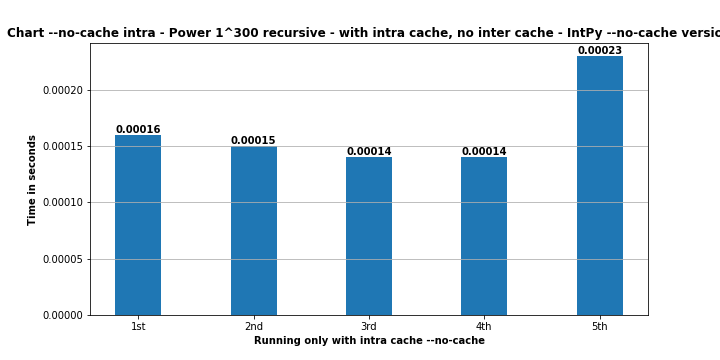

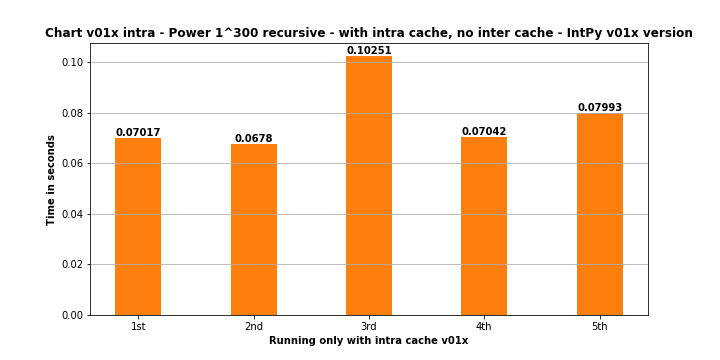

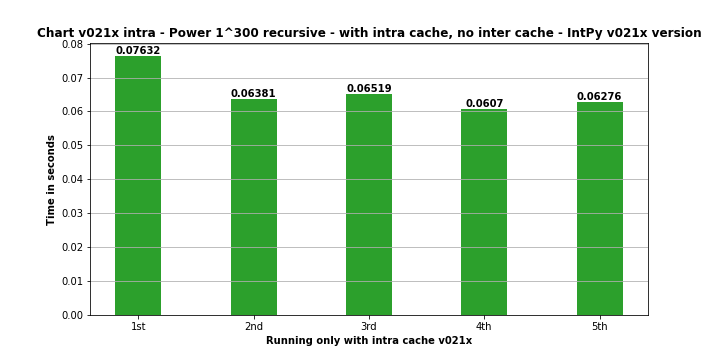

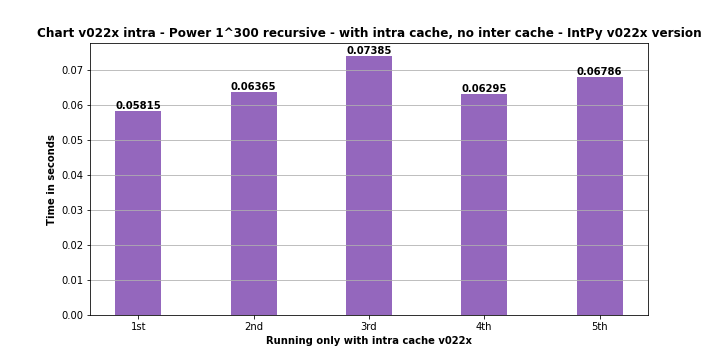

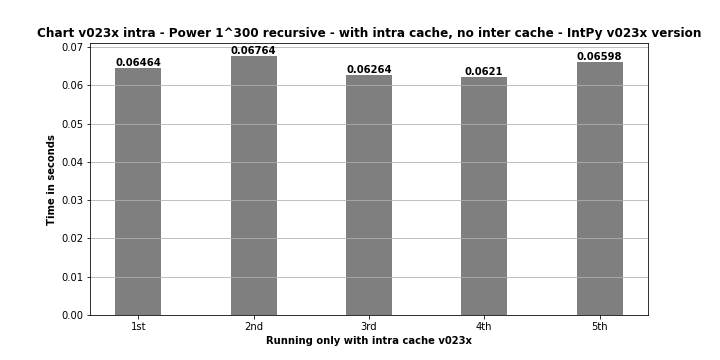

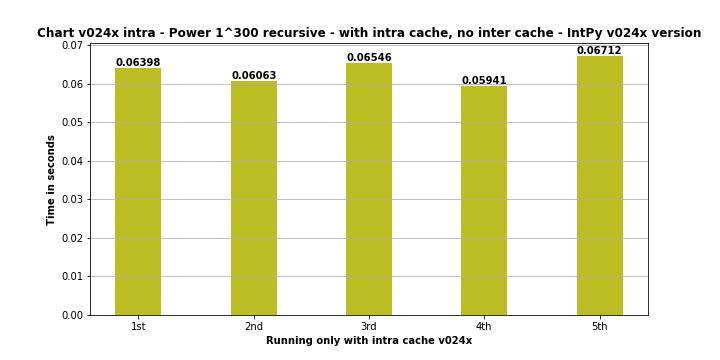

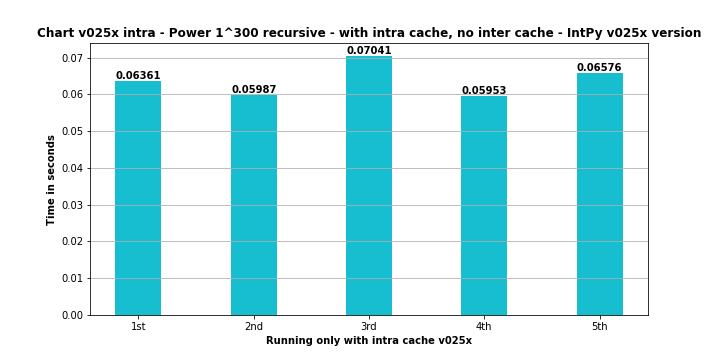

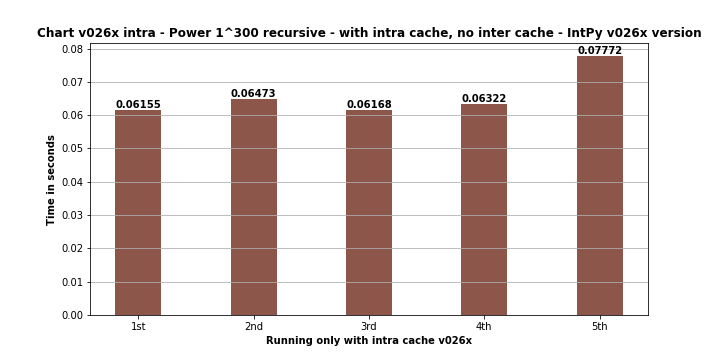

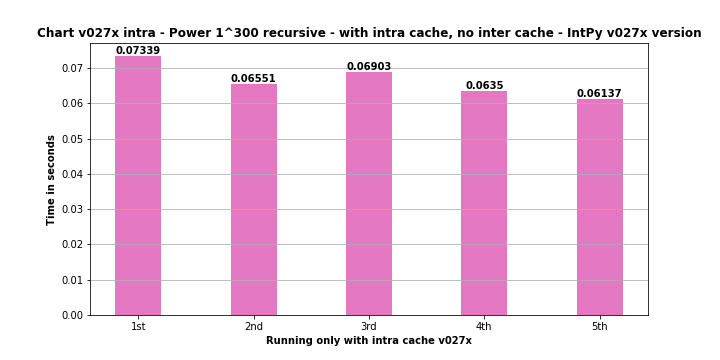

In [24]:
versions = ['--no-cache', 'v01x', 'v021x', 'v022x', 'v023x', 'v024x', 'v025x', 'v026x', 'v027x']

from IPython.display import Image, display

for i in versions:
    display(Image("chart_intra_"+i+".png"))
    print("=====================================================================================")

###**1.3.2 Full cache charts -> intra and inter-cache**

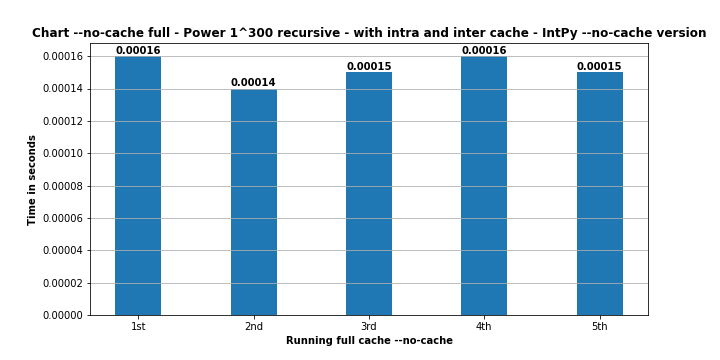

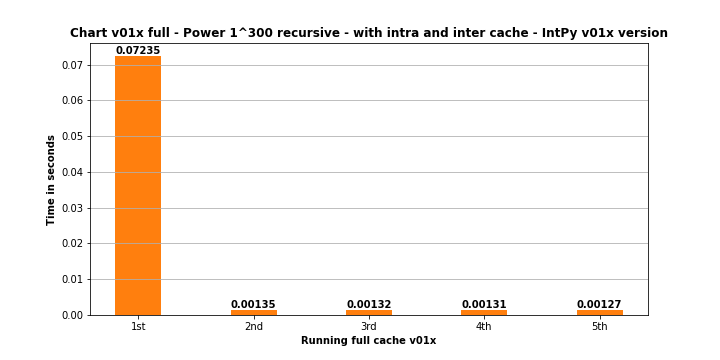

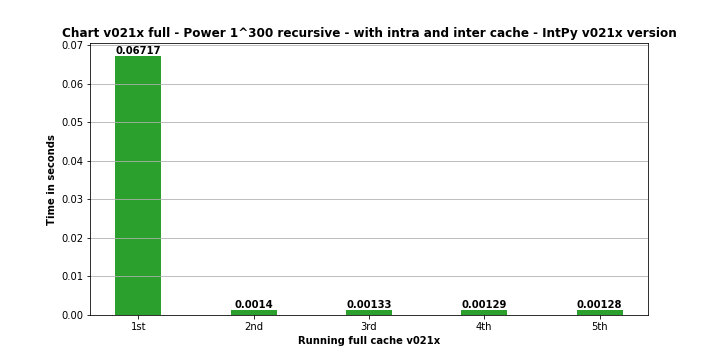

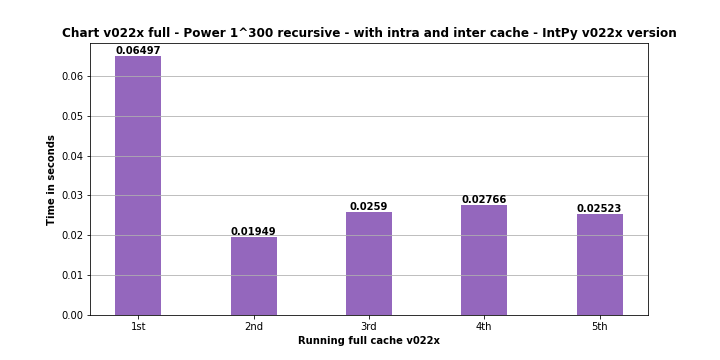

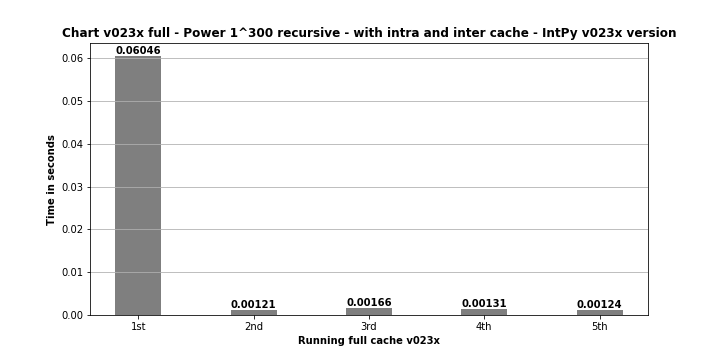

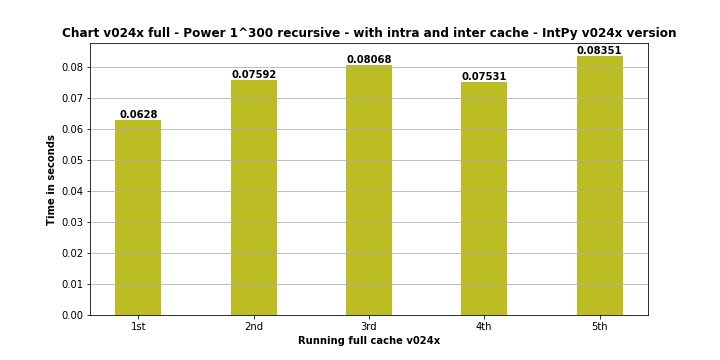

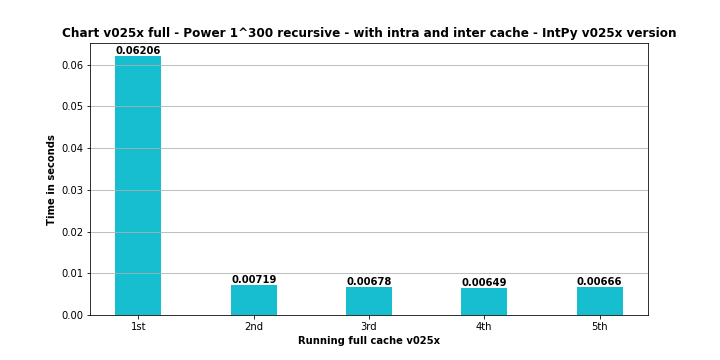

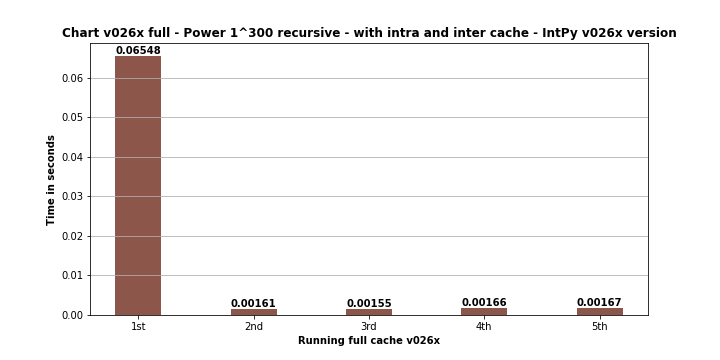

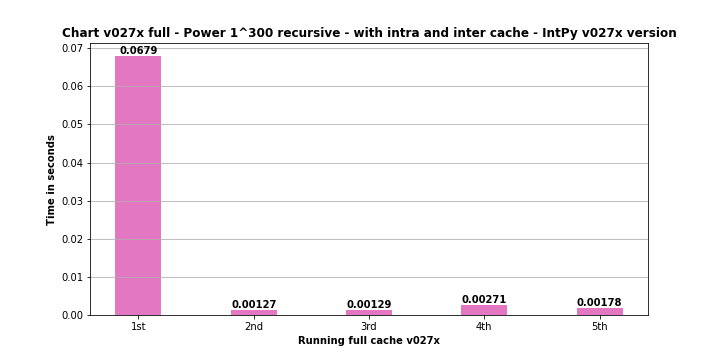

In [25]:
versions = ['--no-cache', 'v01x', 'v021x', 'v022x', 'v023x', 'v024x', 'v025x', 'v026x', 'v027x']

from IPython.display import Image, display

for i in versions:
    display(Image("chart_full_"+i+".png"))
    print("=====================================================================================")

###**1.3.3 Only intra-cache: median comparison chart of all versions**

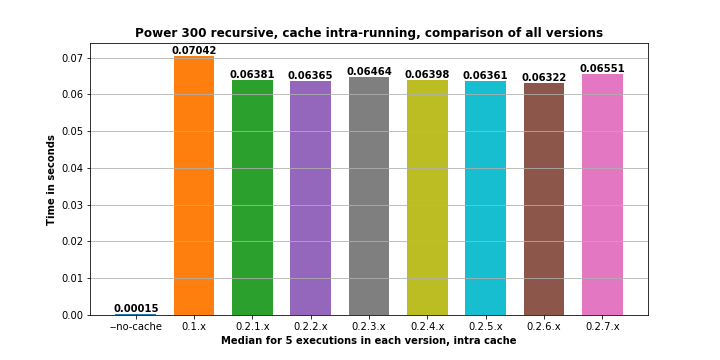

In [26]:
from IPython.display import Image, display
display(Image("compare_median_intra.png"))

###**1.3.4 Full cache -> intra and inter-cache: median comparison chart of all versions**

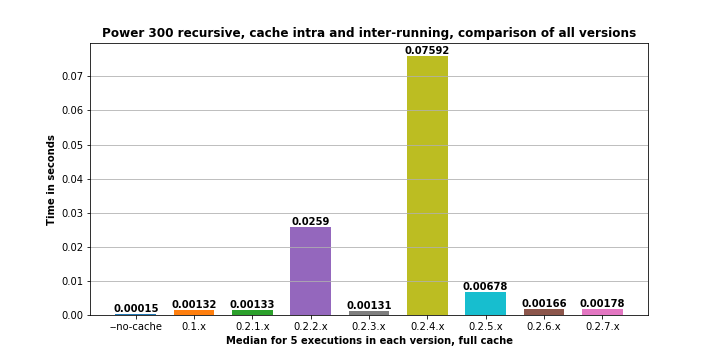

In [27]:
from IPython.display import Image, display
display(Image("compare_median_full.png"))